<a href="https://colab.research.google.com/github/trevor-webster/2024Fall-MOCS/blob/main/Assignment2CellularAutomata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment #2**
Carina Manitius, Trevor Webster, Derek Devine, Nate Borland

# 1

# City Growth

$$X_{N+1} = r X_N(1-X_N)$$

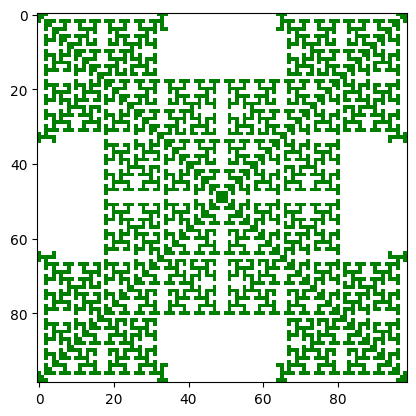

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display

import time

# chance to turn into a city for each possible number of city neighbors
chance_0 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_1 = 1 # @param {type:"slider", min:0, max:1, step:0.01}
chance_2 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_3 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_4 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_5 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_6 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_7 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
chance_8 = 0 # @param {type:"slider", min:0, max:1, step:0.01}
r_growth_rate   = 1 # @param {type:"slider", min:0, max:1, step:0.01}
# listed for easy indexing
chances = [chance_0, chance_1, chance_2, chance_3, chance_4, chance_5, chance_6, chance_7, chance_8]
K = 9 - 1
# displays the current state of green_world cells
def display_world(world):
    plt.imshow(np.flipud(world), cmap=plt.get_cmap(cm.ocean))
    display.display(plt.gcf())
    display.clear_output(wait=True)

# counts up the city neighbors of the world cell at [i,j]
def count_city_neighbors(world, world_size, i, j):
    neighborhood = world[max(i-1,0):min(i+2,world_size), max(j-1,0):min(j+2,world_size)]
    count = np.count_nonzero(neighborhood)
    # for k in range(len(neighborhood)):
    #     for l in range(len(neighborhood[k])):
    #         if (k != i or l != j) and neighborhood[k][l] == 1:
    #             count+=1
    # for k in range(max(0, i-1), min(world_size, i+2)):
    #     for l in range(max(0, j-1), min(world_size, j+2)):
    #         # if (k != i or l != j) and world[k,l] == 1:
    #         if world[k][l] == 1:
    #             count += 1
    
    return count

def logistic_rule(neighbor_count):
    return np.random.rand() < r_growth_rate * (neighbor_count/K) * (1 - (neighbor_count/K))

## Explicit zoning rules for each neighbor count
def rule(neighbor_count):
    return (chances[neighbor_count] > 0 and np.random.rand() < chances[neighbor_count])

def update_world(world, world_size):
    next_world = world.copy()
    reached_edge = False
    for i in range(world_size):
        for j in range(world_size):
            if world[i][j] == 1:
                continue
            neighbor_count = count_city_neighbors(world, world_size,i,j)
            if(rule(neighbor_count)):
                next_world[i,j] = 1
                if i == 0 or j == 0 or i == world_size-1 or j == world_size-1:
                    reached_edge = True
            
    # print(next_world)
    return (next_world, reached_edge)

def run_percolation():
    size = 99
    world = np.zeros((size,size))
    world[size//2,size//2] = 1
    reached_edge = False
    n = 0
    while not reached_edge:
        display_world(world)
        # time.sleep(0.1)
        (world, reached_edge) = update_world(world, size)
    return world


world = run_percolation()
# display_world(world)


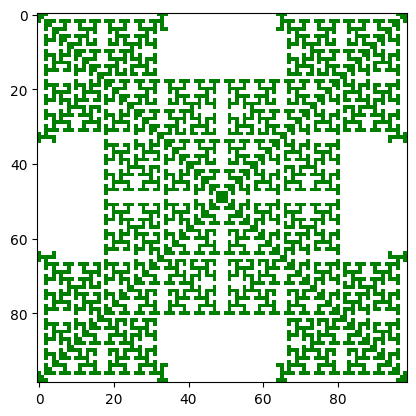

In [2]:
green_world = np.abs(world - 1)
display_world(green_world)

KeyboardInterrupt: 

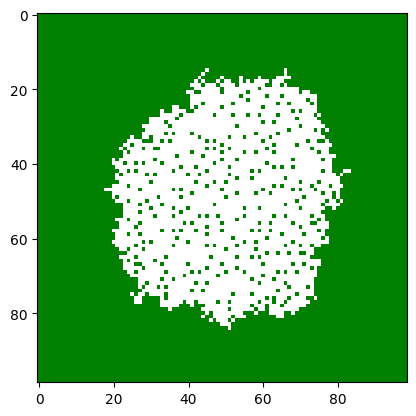

In [27]:
#@title Plot percolation { run: "auto" }

import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib import cm

from IPython import display
from time import sleep



world = run_percolation() #run model
green_world = np.abs(world - 1)
# Set up the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.set_ylim(0,N1)
ax1.set_xlim(0,N2)
ax2.set_ylim(0,N1)
ax2.set_xlim(0,N2)
ax1.set_aspect('equal')
ax2.set_aspect('equal')

#filter largest cluster
structure = [[0,1,0],[1,1,1],[0,1,0]] #define connection
structure = [[1,0,1],[0,1,0],[1,0,1]] #define connection
label_world, nb_labels = ndimage.label(green_world,structure) #label clusters
sizes = ndimage.sum(green_world, label_world, range(nb_labels + 1))
mask = sizes >= sizes.max()
binary_img = mask[label_world]

# Plot the world
ax1.imshow((green_world), cmap=plt.get_cmap(cm.bone), origin = 'lower')
ax2.imshow(binary_img, cmap=plt.get_cmap(cm.bone), origin = 'lower')

# Add label
ax1.text(2, N1+5, f'Site percolation with probability {probability}', color='Orange', fontsize=18)
ax2.text(2, N1+5, f'Largest cluster found', color='Orange', fontsize=18)
plt.show()